In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import matplotlib.pyplot as plt
import requests

import seaborn as sns


In [3]:
email = "abhishek.deshpande1131@gmail.com"
key   = "ecruram76"

In [4]:
## What parameter classes are being tracked?
response = requests.get(f'https://aqs.epa.gov/data/api/list/classes?email={email}&key={key}')
js = response.json()
params = pd.DataFrame(js['Data'])
print(params)

                       code                                  value_represented
0               AIRNOW MAPS  The parameters represented on AirNow maps (881...
1                       ALL                    Select all Parameters Available
2            AQI POLLUTANTS                Pollutants that have an AQI Defined
3                 CORE_HAPS                         Urban Air Toxic Pollutants
4                  CRITERIA                                Criteria Pollutants
5                  CSN DART  List of CSN speciation parameters to populate ...
6                  FORECAST     Parameters routinely extracted by AirNow (STI)
7                      HAPS                           Hazardous Air Pollutants
8            IMPROVE CARBON                          IMPROVE Carbon Parameters
9        IMPROVE_SPECIATION  PM2.5 Speciated Parameters Measured at IMPROVE...
10                      MET                          Meteorological Parameters
11          NATTS CORE HAPS  The core list of toxics

In [5]:
## parameters in a class
response = requests.get(f'https://aqs.epa.gov/data/api/list/parametersByClass?email={email}&key={key}&pc=MET')
js = response.json()
aqi = pd.DataFrame(js['Data'])
print(aqi)

     code               value_represented
0   61101             Wind Speed - Scalar
1   61102         Wind Direction - Scalar
2   61103          Wind Speed - Resultant
3   61104      Wind Direction - Resultant
4   61105                  Peak Wind Gust
5   61106       Std Dev Hz Wind Direction
6   61107       Std Dev Vt Wind Direction
7   61109             Vertical Wind Speed
8   61110           Std Dev Vt Wind Speed
9   61111           Std Dev Hz Wind Speed
10  61112             Vert Wind Direction
11  61120           Atmospheric Stability
12  61202                      Lapse Rate
13  61301                   Mixing Height
14  61302                    Mixing Speed
15  62101             Outdoor Temperature
16  62102             Virtual Temperature
17  62103                       Dew Point
18  62104           Temperature 24-Hr Max
19  62105           Temperature 24-Hr Min
20  62106          Temperature Difference
21  62108                Soil Temperature
22  62201              Relative Hu

In [18]:
## state id 

response = requests.get(f'https://aqs.epa.gov/data/api/list/states?email={email}&key={key}')
js = response.json()
states = pd.DataFrame(js['Data'])
print(states)

   code     value_represented
0    01               Alabama
1    02                Alaska
2    04               Arizona
3    05              Arkansas
4    06            California
5    08              Colorado
6    09           Connecticut
7    10              Delaware
8    11  District Of Columbia
9    12               Florida
10   13               Georgia
11   15                Hawaii
12   16                 Idaho
13   17              Illinois
14   18               Indiana
15   19                  Iowa
16   20                Kansas
17   21              Kentucky
18   22             Louisiana
19   23                 Maine
20   24              Maryland
21   25         Massachusetts
22   26              Michigan
23   27             Minnesota
24   28           Mississippi
25   29              Missouri
26   30               Montana
27   31              Nebraska
28   32                Nevada
29   33         New Hampshire
30   34            New Jersey
31   35            New Mexico
32   36   

In [19]:
## Get counties for state:
response = requests.get(f'https://aqs.epa.gov/data/api/list/countiesByState?email={email}&key={key}&state=06')
js = response.json()
counties = pd.DataFrame(js['Data'])
print(counties)

   code value_represented
0   001           Alameda
1   003            Alpine
2   005            Amador
3   007             Butte
4   009         Calaveras
5   011            Colusa
6   013      Contra Costa
7   015         Del Norte
8   017         El Dorado
9   019            Fresno
10  021             Glenn
11  023          Humboldt
12  025          Imperial
13  027              Inyo
14  029              Kern
15  031             Kings
16  033              Lake
17  035            Lassen
18  037       Los Angeles
19  039            Madera
20  041             Marin
21  043          Mariposa
22  045         Mendocino
23  047            Merced
24  049             Modoc
25  051              Mono
26  053          Monterey
27  055              Napa
28  057            Nevada
29  059            Orange
30  061            Placer
31  063            Plumas
32  065         Riverside
33  067        Sacramento
34  069        San Benito
35  071    San Bernardino
36  073         San Diego
37  075     

In [43]:
state = '06' #california - 06
county = '033' #lake - 033(both avail//61 entries), glenn -021(only pm10 at 0003 site), mendocino-045(only pm25)
#tehama -103(pm25-6756vals, pm10-41vals), trinity -105(no data), shasta -NA 

# 42101                         Carbon monoxide
# 42401                          Sulfur dioxide
# 42602                  Nitrogen dioxide (NO2)
# 44201                                   Ozone
# 81102                   PM10 Total 0-10um STP
# 88101                PM2.5 - Local Conditions
# 88502  Acceptable PM2.5 AQI & Speciation Mass

pm25 = '88101'
pm10 = '81102'
aat = '68105'

In [44]:
response = requests.get(f'https://aqs.epa.gov/data/api/list/sitesByCounty?email={email}&key={key}&state={state}&county={county}')
js = response.json()
sites = pd.DataFrame(js['Data'])
print(sites.shape)
print(sites)


for i in sites['code']:
    response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={aat}&bdate=20200101&edate=20201231&state={state}&county={county}&site={i}')
    js = response.json()
    data = pd.DataFrame(js['Data'])
    print(response, i, data.shape)

(10, 2)
   code                        value_represented
0  0002                                     None
1  0003                                     None
2  1001                                     None
3  2001                      Lakeport-Forbes St.
4  3001                  Lakeport-Lakeport Blvd.
5  3002                  Lakeport-S. Main Street
6  3010                         ANDERSON SPRINGS
7  3011                                GLENBROOK
8  3012                       HOBERG-PINE SUMMIT
9  3013  TRAILER AT RESIDENCE.  RURAL COMMUNITY.
<Response [200]> 0002 (0, 0)
<Response [200]> 0003 (0, 0)
<Response [200]> 1001 (0, 0)
<Response [200]> 2001 (0, 0)
<Response [200]> 3001 (0, 0)
<Response [200]> 3002 (61, 29)
<Response [200]> 3010 (0, 0)
<Response [200]> 3011 (0, 0)
<Response [200]> 3012 (0, 0)
<Response [200]> 3013 (0, 0)


In [45]:
#### variables
county_name = 'Lake County'
sitecode = '3002'

(61, 29)
    year  month  unique days
0   2020      1            5
1   2020      2            5
2   2020      3            5
3   2020      4            5
4   2020      5            5
5   2020      6            5
6   2020      7            5
7   2020      8            6
8   2020      9            5
9   2020     10            5
10  2020     11            5
11  2020     12            5


(63, 29)
    year  month  unique days
0   2019      1            5
1   2019      2            5
2   2019      3            6
3   2019      4            5
4   2019      5            5
5   2019      6            5
6   2019      7            5
7   2019      8            6
8   2019      9            5
9   2019     10            5
10  2019     11            5
11  2019     12            6


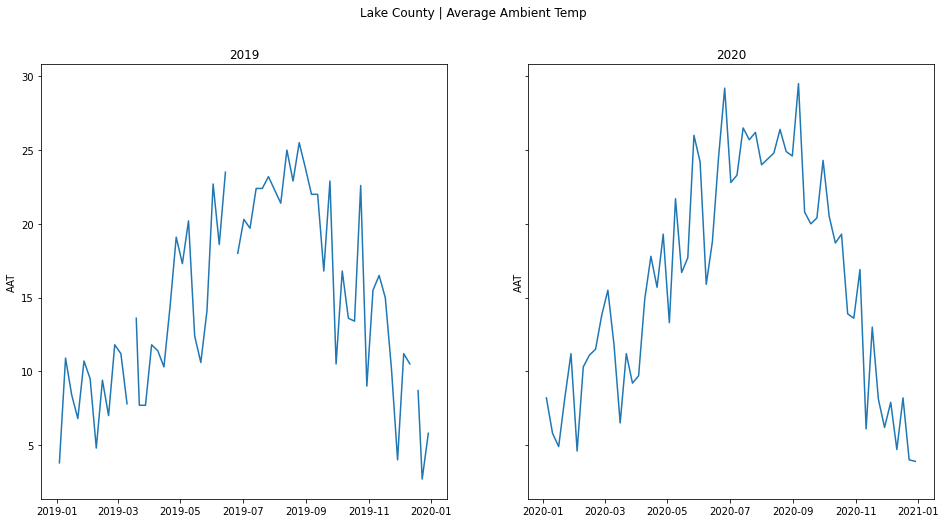

In [51]:
#TEMP
#2020
name0 = 'Average Ambient Temp'
response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={aat}&bdate=20200101&edate=20201231&state={state}&county={county}&site={sitecode}')
js = response.json()
data1= pd.DataFrame(js['Data'])
print(data1.shape)

ds1 = data1.sort_values(['date_gmt', 'time_gmt'])
ds1['date_gmt'] = pd.to_datetime(ds1['date_gmt'])
# ds1.plot(x='date_gmt', y='sample_measurement')

print(ds1.date_gmt.groupby([ds1.date_gmt.dt.year, ds1.date_gmt.dt.month])
  .nunique()
  .rename_axis(['year', 'month'])
  .reset_index(name='unique days'))

fig1 = px.scatter(ds1, x="date_gmt", y="sample_measurement", title = 'Average Ambient Temp | 2020', color = ds1.date_gmt.dt.month)
fig1.show()

##########################################################################################################

#2019

response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={aat}&bdate=20190101&edate=20191231&state={state}&county={county}&site={sitecode}')
js = response.json()
data2= pd.DataFrame(js['Data'])
print(data2.shape)

ds2 = data2.sort_values(['date_gmt', 'time_gmt'])
ds2['date_gmt'] = pd.to_datetime(ds2['date_gmt'])
# ds2.plot(x='date_gmt', y='sample_measurement')

print(ds2.date_gmt.groupby([ds2.date_gmt.dt.year, ds2.date_gmt.dt.month])
  .nunique()
  .rename_axis(['year', 'month'])
  .reset_index(name='unique days'))

fig2 = px.scatter(ds2, x="date_gmt", y="sample_measurement", title = 'Average Ambient Temp | 2019', color = ds2.date_gmt.dt.month)
fig2.show()

##########################################################################################################

fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True)
fig.suptitle(f'{county_name} | Average Ambient Temp')
ax[0].plot(ds2['date_gmt'], ds2['sample_measurement'])
ax[0].set(title = '2019', ylabel = 'AAT')
ax[1].plot(ds1['date_gmt'], ds1['sample_measurement'])
ax[1].set(title = '2020', ylabel = 'AAT')

plt.show()

    year  month  unique days
0   2020      1            5
1   2020      2            5
2   2020      3            5
3   2020      4            5
4   2020      5            5
5   2020      6            5
6   2020      7            5
7   2020      8            6
8   2020      9            5
9   2020     10            5
10  2020     11            5
11  2020     12            5


(64, 29)
    year  month  unique days
0   2019      1            5
1   2019      2            5
2   2019      3            6
3   2019      4            5
4   2019      5            6
5   2019      6            5
6   2019      7            5
7   2019      8            6
8   2019      9            5
9   2019     10            5
10  2019     11            5
11  2019     12            6


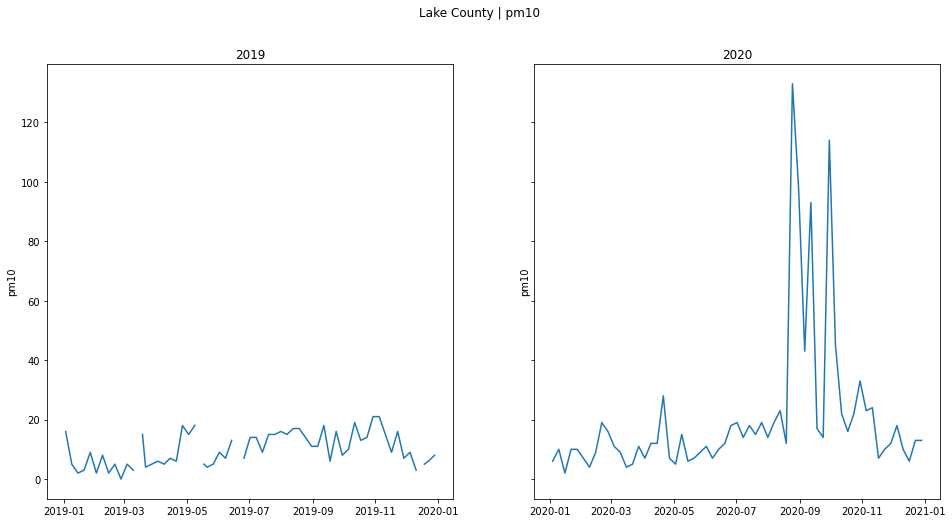

In [53]:
param = pm10
name = 'pm10'
#2020

response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={param}&bdate=20200101&edate=20201231&state={state}&county={county}&site={sitecode}')
js = response.json()
data01= pd.DataFrame(js['Data'])

ds01 = data01.sort_values(['date_gmt', 'time_gmt'])
ds01['date_gmt'] = pd.to_datetime(ds01['date_gmt'])
# ds01.plot(x='date_gmt', y='sample_measurement')

print(ds01.date_gmt.groupby([ds01.date_gmt.dt.year, ds01.date_gmt.dt.month])
  .nunique()
  .rename_axis(['year', 'month'])
  .reset_index(name='unique days'))

fig3 = px.scatter(ds01, x="date_gmt", y="sample_measurement", title = f'{name} | 2020', color = ds01.date_gmt.dt.month)
fig3.show()

##########################################################################################################

#2019

response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={param}&bdate=20190101&edate=20191231&state={state}&county={county}&site={sitecode}')
js = response.json()
data02= pd.DataFrame(js['Data'])
print(data02.shape)

ds02 = data02.sort_values(['date_gmt', 'time_gmt'])
ds02['date_gmt'] = pd.to_datetime(ds02['date_gmt'])
# ds2.plot(x='date_gmt', y='sample_measurement')

print(ds02.date_gmt.groupby([ds02.date_gmt.dt.year, ds02.date_gmt.dt.month])
  .nunique()
  .rename_axis(['year', 'month'])
  .reset_index(name='unique days'))

fig4 = px.scatter(ds02, x="date_gmt", y="sample_measurement", title = f'{name} | 2019', color = ds02.date_gmt.dt.month)
fig4.show()

##########################################################################################################

fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True)
fig.suptitle(f'{county_name} | {name}')
ax[0].plot(ds02['date_gmt'], ds02['sample_measurement'])
ax[0].set(title = '2019', ylabel = f'{name}')
ax[1].plot(ds01['date_gmt'], ds01['sample_measurement'])
ax[1].set(title = '2020', ylabel = f'{name}')

plt.show()


In [54]:
ds1=ds1.resample('M', label='right', closed = 'right', on='date_gmt').mean().reset_index().sort_values(by='date_gmt')
ds2=ds2.resample('M', label='right', closed = 'right', on='date_gmt').mean().reset_index().sort_values(by='date_gmt')
ds01=ds01.resample('M', label='right', closed = 'right', on='date_gmt').mean().reset_index().sort_values(by='date_gmt')
ds02=ds02.resample('M', label='right', closed = 'right', on='date_gmt').mean().reset_index().sort_values(by='date_gmt')

### 2019 ###
xlist = ds2["sample_measurement"]
xlist = np.asarray(xlist)
ylist = ds02["sample_measurement"]
ylist = np.asarray(ylist)
merged_list = tuple(zip(xlist, ylist))

### 2020 ###
xlist1 = ds1["sample_measurement"]
xlist1 = np.asarray(xlist1)
ylist1 = ds01["sample_measurement"]
ylist1 = np.asarray(ylist1)
merged_list1 = tuple(zip(xlist1, ylist1))

fig= go.Figure()


fig.add_trace(go.Scatter(x=ds2["sample_measurement"], y=ds02["sample_measurement"], mode = 'markers', name="2019"))

fig.add_trace(go.Scatter(x=ds1["sample_measurement"], y=ds01["sample_measurement"], mode = 'markers', name="2020"))


month_19 = ['Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sep19','Oct19','Nov19','Dec19']
month_20 = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20']
num_month = [0,1,3,5,7,9,11] 

month_list = list(map(lambda x, y:(x,y), month_19, month_20)) 

for i in num_month:
    fig.add_annotation(
                x=merged_list[i][0],
                y=merged_list[i][1],
                text= month_list[i][0],
    showarrow=True,
            font=dict(
                family="Courier New, monospace",
                size=13,
                color="#ffffff"
                ),
            align="center",
            arrowhead=6,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=0,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=1,
            bgcolor="#ff7f0e",
            opacity=0.7)


    fig.add_annotation(
                x=merged_list1[i][0],
                y=merged_list1[i][1],
                text= month_list[i][1],
    showarrow=True,
            font=dict(
                family="Courier New, monospace",
                size=13,
                color="#ffffff"
                ),
            align="center",
            arrowhead=6,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=0,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=1,
            bgcolor="#ff7f0e",
            opacity=0.7)

    fig.update_annotations(visible=True)

###################################### joining corresponding months #################

for i in num_month:
    fig.add_shape(type="line",
    x0=merged_list[i][0], y0=merged_list[i][1], x1=merged_list1[i][0], y1=merged_list1[i][1],
    line=dict(
        color="LightSeaGreen",
        width=4,
        dash="dashdot",
    )
             )

####################################################################################
fig.update_layout(
    showlegend=True,
    title={
        'text': f" {county_name} | 2019 vs 2020",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title=f"{name0}",
    yaxis_title=f"{name}",
    annotations=[
        dict(
            xref="x",
            yref="y",
        )
    ]
)
fig.show()
fig.write_html(f"{county_name}_temp_{name}.html")